# MNIST autoencoder from nnBuilder

A basic convolutional autoencoder for MNIST

In [1]:
import numpy as np
import tensorflow as tf
import sys, os, seaborn, time
import matplotlib.pyplot as plt
sys.path.append('../nnBuilder')
from nnLayer import *
from nnInput import *
from nnTrainer import *
from nnHandler import *

In [2]:
data=Layer(type="MNIST",batch=128)
data_test=Layer(type="MNIST",test=True)
layers=[]
layers.append(dict(type="Identity_Label"))
layers.append(dict(type="Noise",rand_type="uniform",scale=.2,drop_on_test=True))
layers.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=16,relu=True))
layers.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
layers.append(dict(type="Batch_Norm"))
layers.append(dict(type="Noise",rand_type="uniform",scale=.2,drop_on_test=True))
layers.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=16,relu=True))
layers.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
layers.append(dict(type="Batch_Norm"))
layers.append(dict(type="Noise",rand_type="uniform",scale=.2,drop_on_test=True))
layers.append(dict(type="Relu",size=32*4))
layers.append(dict(type="Batch_Norm"))
layers.append(dict(type="Noise",rand_type="uniform",scale=.2,drop_on_test=True))
layers.append(dict(type="Relu",size=32))
layers.append(dict(type="Batch_Norm"))
layers.append(dict(type="Relu",size=32*4))
layers.append(dict(type="Batch_Norm"))
layers.append(dict(type="Relu",size=49*16))
layers.append(dict(type="Batch_Norm"))
layers.append(dict(type="Reshape",shape=[-1,7,7,16]))
layers.append(dict(type="Convolution_Transpose",pad="SAME",window=5,stride=2,size=16,relu=True))
layers.append(dict(type="Batch_Norm"))
layers.append(dict(type="Convolution_Transpose",pad="SAME",window=5,stride=2,size=1,relu=False))
layers.append(dict(type="Sigmoid_Feature"))
network_def=dict(type="Network",layers=layers)
network=Layer(x=data,**network_def)
network_eval=network.copy(share_vars=True,test=True)
network_test=network.copy(x=data_test,share_vars=True,test=True)
trainer=LabeledTrainer(network=network,optimizer="adam",loss="mean_squared_error")
trainer_eval=LabeledTrainer(network=network_eval,optimizer="adam",loss="mean_squared_error",test=True)
tester=LabeledTrainer(network=network_test,loss="mean_squared_error",test=True)
sess=SessManager(data,network,trainer,data_test,network_test,tester,network_eval,trainer_eval)
sess.start()

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
train
Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
test
Starting new session


0.479212


<IPython.core.display.Javascript object>


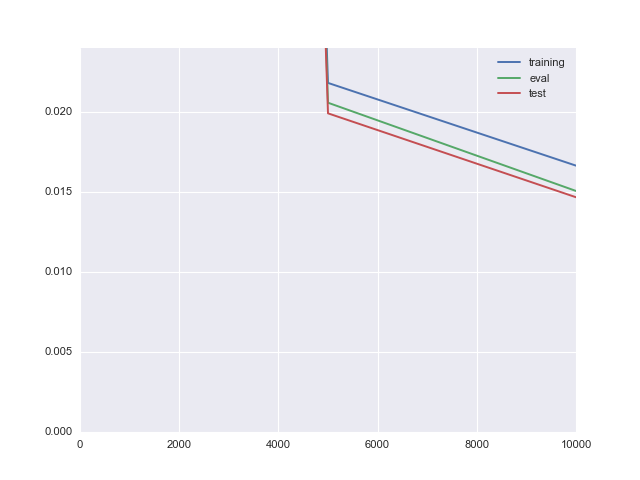

0.02181
0.020572
0.0199093
0.0166412
0.015059
0.0146667


KeyboardInterrupt: 

In [3]:
batches_per_step=5000#60000//128 #About 1 epoch
batches_per_eval=100
n_steps=500
def make_plt():
    %matplotlib notebook
    global fig,ax,train_plot,test_plot,eval_plot
    fig,ax = plt.subplots(1,1)
    train_plot=ax.plot([],[], label="training")[0]
    eval_plot=ax.plot([],[], label="eval")[0]
    test_plot=ax.plot([],[], label="test")[0]
    ax.set_ylim(0,1)
    plt.legend()
    fig.canvas.draw()
    time.sleep(.01)
def update_plt():
    x=[batches_per_step*i for i in range(len(trains))]
    train_plot.set_xdata(x)
    train_plot.set_ydata(trains)
    test_plot.set_xdata(x)
    test_plot.set_ydata(tests)
    eval_plot.set_xdata(x)
    eval_plot.set_ydata(evals)
    ax.set_xlim(0,x[-1])
    ax.set_ylim(0,trains[1]*1.1)
    fig.canvas.draw()
    #time.sleep(.01)
if "trains" not in globals():
    trains=[trainer.eval_loss(n=batches_per_eval,show=False)]
    evals=[trainer_eval.eval_loss(n=batches_per_eval)]
    tests=[tester.eval_loss(show=False)]
make_plt()
for i in range(n_steps):
    trainer.train(batches_per_step,learn_rate=1e-4)
    trains.append(trainer.eval_loss(n=batches_per_eval)) 
    evals.append(trainer_eval.eval_loss(n=batches_per_eval)) 
    tests.append(tester.eval_loss())
    update_plt()

<IPython.core.display.Javascript object>


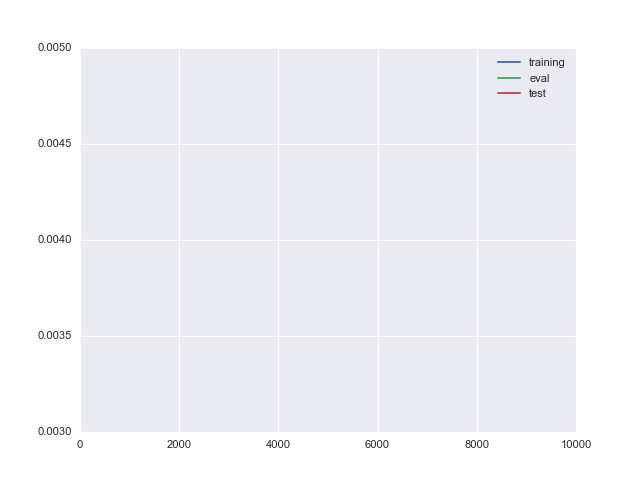

In [4]:
make_plt()
update_plt()
ax.set_ylim(0.003,.005)
fig.canvas.draw()

In [5]:
network.save() #The full network definition
save=network.save() #The full network definition
assert(Layer(x=data,**save).save()==save) #Consistency
print(save==network_def) #Saving adds stuff, should still be equivalent
save

False


{'layers': [{'type': 'Identity_Label'},
  {'combine_op': 'add',
   'drop_on_test': True,
   'mean': 0.0,
   'rand_type': 'uniform',
   'scale': 0.2,
   'type': 'Noise'},
  {'input_channels': None,
   'pad': 'SAME',
   'rand_scale': 0.1,
   'relu': True,
   'size': 16,
   'stride': 1,
   'type': 'Convolution',
   'window': 5},
  {'pad': 'SAME',
   'pool_type': 'max',
   'stride': 2,
   'type': 'Pool',
   'window': 2},
  {'type': 'Batch_Norm'},
  {'combine_op': 'add',
   'drop_on_test': True,
   'mean': 0.0,
   'rand_type': 'uniform',
   'scale': 0.2,
   'type': 'Noise'},
  {'input_channels': None,
   'pad': 'SAME',
   'rand_scale': 0.1,
   'relu': True,
   'size': 16,
   'stride': 1,
   'type': 'Convolution',
   'window': 5},
  {'pad': 'SAME',
   'pool_type': 'max',
   'stride': 2,
   'type': 'Pool',
   'window': 2},
  {'type': 'Batch_Norm'},
  {'combine_op': 'add',
   'drop_on_test': True,
   'mean': 0.0,
   'rand_type': 'uniform',
   'scale': 0.2,
   'type': 'Noise'},
  {'rand_scale':

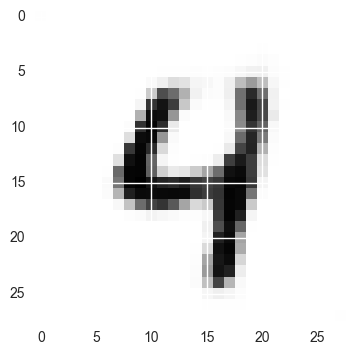

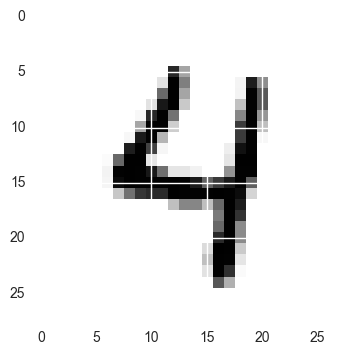

In [6]:
n=27
%matplotlib inline
plot(sess.run(network_test.get())[n,:,:,0])
plt.show()
%matplotlib inline
plot(sess.run(data_test.get())[n,:,:,0])

In [7]:
show(-sess.run(network_test.get())[n,:,:,0])
show(-sess.run(data_test.get())[n,:,:,0])

In [8]:
show(-sess.run(network.get())[n,:,:,0])
show(-sess.run(data.get())[n,:,:,0])

In [9]:
7*7*16

784

In [10]:
16*5*5

400

In [11]:
a=network.export()

In [12]:
Layer(x=data,**a)

In [13]:
a

{'_cloned': <nnLayer.SimpleLayer at 0xf278400>,
 'layers': [{'_cloned': <nnInput.IdentityLabelLayer at 0xf278438>,
   'type': 'Identity_Label'},
  {'_cloned': <nnInput.NoiseLayer at 0xf2787b8>,
   'combine_op': 'add',
   'drop_on_test': True,
   'mean': 0.0,
   'rand_type': 'uniform',
   'scale': 0.2,
   'type': 'Noise'},
  {'_cloned': <nnLayer.ConvLayer at 0xf27af28>,
   'input_channels': None,
   'pad': 'SAME',
   'rand_scale': 0.1,
   'relu': True,
   'size': 16,
   'stride': 1,
   'type': 'Convolution',
   'window': 5},
  {'_cloned': <nnLayer.PoolLayer at 0xf2c7358>,
   'pad': 'SAME',
   'pool_type': 'max',
   'stride': 2,
   'type': 'Pool',
   'window': 2},
  {'_cloned': <nnLayer.make_layer.<locals>.LayerClass at 0xf2a8860>,
   'type': 'Batch_Norm'},
  {'_cloned': <nnInput.NoiseLayer at 0xf2bc5f8>,
   'combine_op': 'add',
   'drop_on_test': True,
   'mean': 0.0,
   'rand_type': 'uniform',
   'scale': 0.2,
   'type': 'Noise'},
  {'_cloned': <nnLayer.ConvLayer at 0xf2cf9b0>,
   'inp

In [14]:
"ty;'pe" in a

False